<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
         <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the data set (Bank Client Data)

#### Bank client data:
**age:** Age of the client<br>
**duration:** last contact duration, in seconds.<br> 

#### Other attributes:
**campaign:** number of contacts performed during this campaign and for this client<br>
**pdays:** number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)<br>
**previous:** number of contacts performed before this campaign and for this client<br>

#### Social and economic context attributes
**emp.var.rate:** employment variation rate - quarterly indicator<br>
**cons.price.idx:** consumer price index - monthly indicator<br>
**cons.conf.idx:** consumer confidence index - monthly indicator<br>
**euribor3m:** euribor 3 month rate - daily indicator<br>
**nr.employed:** number of employees - quarterly indicator<br>

**y** - (Output variable) has the client subscribed a term deposit?

Data citation: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## Table of Content

1. **[Data Preprocessing](#dp)**
1. **[K Nearest Neighbors (KNN)](#knn)**
2. **[Naive Bayes](#nb)**

**Import the required libraries**

In [198]:
# type your code here
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
from sklearn.metrics import classification_report, recall_score

# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import classification_report, recall_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm

# import function to perform feature selection
from sklearn.feature_selection import RFE

#### Load the csv file

In [199]:
# type your code here
# load the csv file
# store the data in 'df_cancer'
df = pd.read_csv('bank.csv')
x = df.drop('y',axis = 1)
y = df['y']

In [200]:
df.shape

(9640, 11)

<a id="dp"> </a>
## 1. Data Preprocessing

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Remove the outliers (if any).</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [201]:
# type your code here

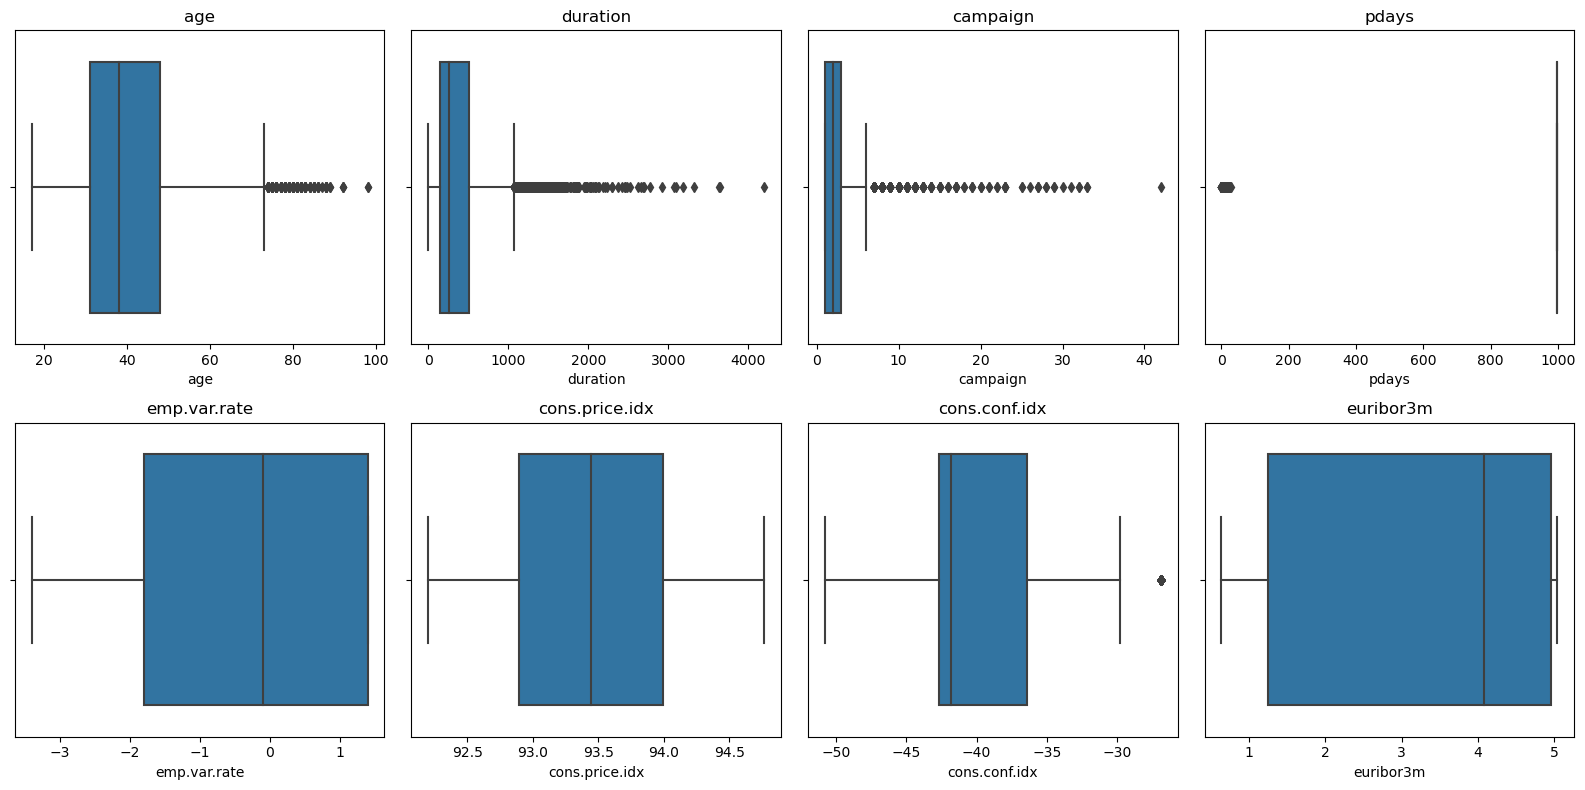

In [202]:
subset_df = df[['age','duration','campaign','pdays','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m']]
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Loop through the columns and create boxplots
for i, col in enumerate(subset_df.columns):
    sns.boxplot(x=subset_df[col], ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(col)

plt.tight_layout()
plt.show()

In [203]:
# Assuming you have a DataFrame 'df' containing your data

# Define a function to apply capping to a column
def cap_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column[column < lower_bound] = lower_bound
    column[column > upper_bound] = upper_bound
    return column

# Select only numerical columns for outlier treatment
numerical_columns = df.select_dtypes(include=[np.number])

# Apply the cap_outliers function to each numerical column
df[numerical_columns.columns] = numerical_columns.apply(cap_outliers)

# Now, 'df' contains your data with outliers capped for all numerical columns


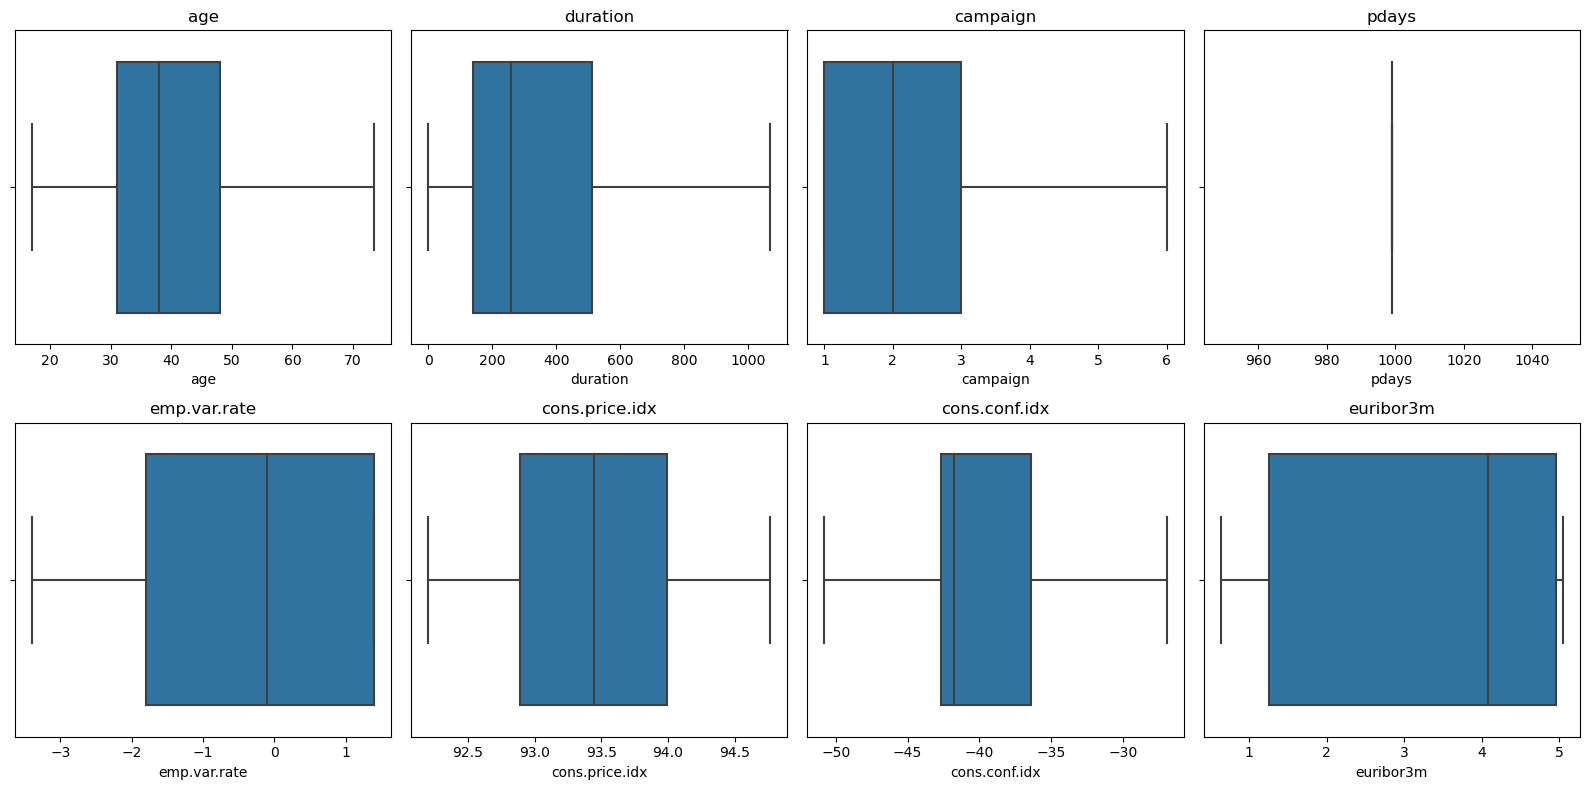

In [204]:
subset_df = df[['age','duration','campaign','pdays','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m']]
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Loop through the columns and create boxplots
for i, col in enumerate(subset_df.columns):
    sns.boxplot(x=subset_df[col], ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(col)

plt.tight_layout()
plt.show()

In [205]:
df.shape

(9640, 11)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Separate the dependent and the independent variables. Also, in the target variable, replace no with 0 and yes with 1.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [206]:
# type your code here

In [207]:
x = df.drop('y', axis = 1)
y = df['y']

In [208]:
y = y.apply(lambda x : 1 if x == 'yes' else 0 )

In [209]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Look for the null values and treat the null values.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [210]:
# type your code here

In [211]:
df.isnull().sum().sum()

0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Remove the unnecessary variables that will not contribute to the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [212]:
# type your code here

In [213]:
df.head(2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32.000000,205.000000,2,999,0,1.100000,93.994000,-36.400000,4.858000,5191.000000,no
1,32.000000,691.000000,6,999,0,1.400000,93.918000,-42.700000,4.960000,5228.100000,yes


In [214]:
df.drop(['previous','pdays'],axis = 1,inplace = True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Plot the distribution of all the numeric variables and find the value of skewness for each variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [215]:
# type your code here

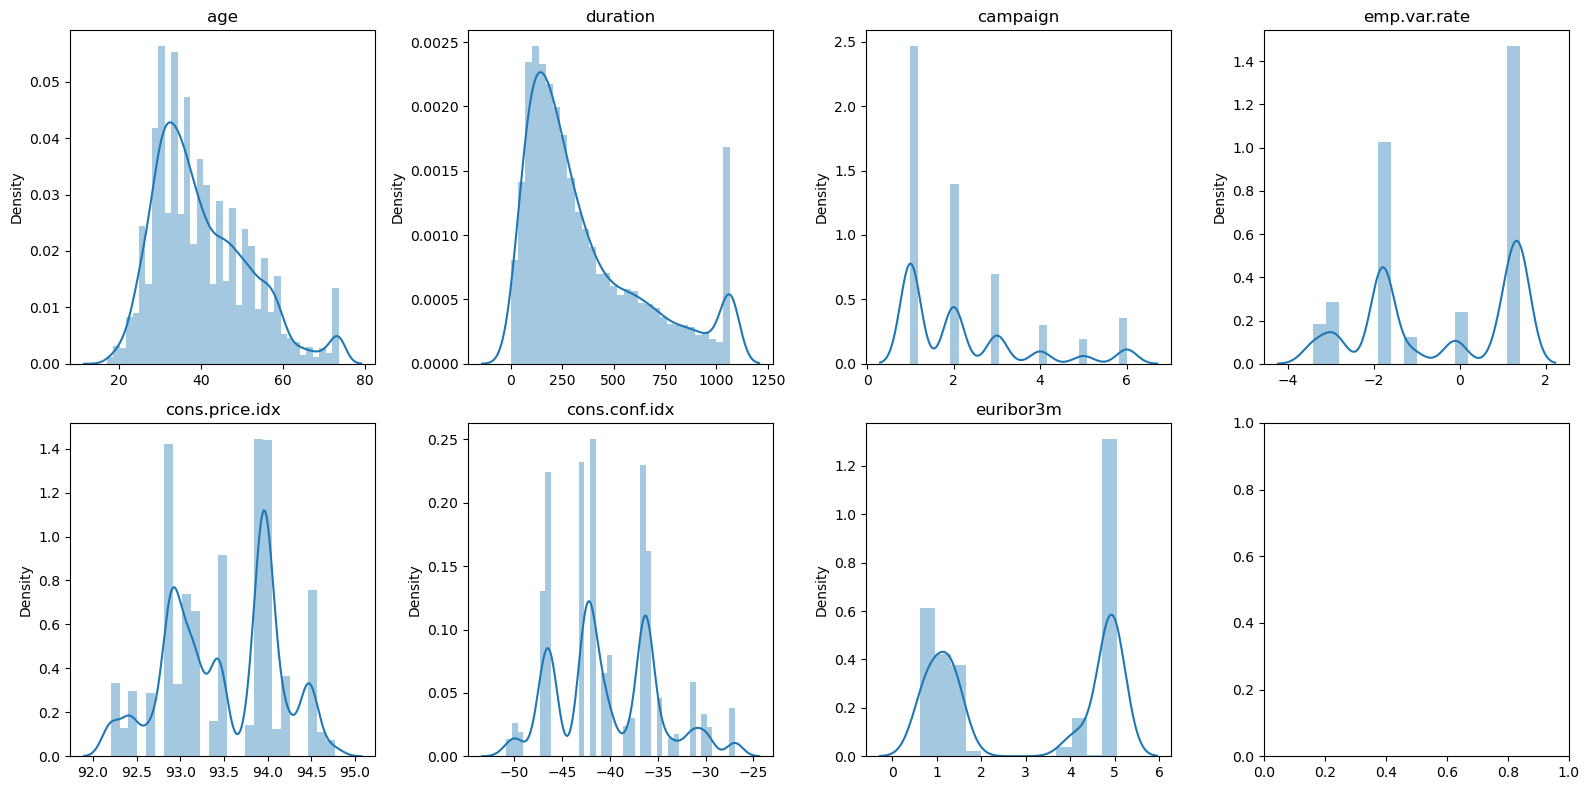

In [216]:
subset_df = df[['age','duration','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m']]
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Loop through the columns and create boxplots
for i, col in enumerate(subset_df.columns):
    sns.distplot(x=subset_df[col], ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(col)
plt.tight_layout()
plt.show()

In [217]:
df.skew()

age               0.788079
duration          1.089882
campaign          1.356104
emp.var.rate     -0.181234
cons.price.idx   -0.125216
cons.conf.idx     0.347668
euribor3m        -0.058332
nr.employed      -0.463581
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Plot the distribution of the target variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [218]:
# type your code here

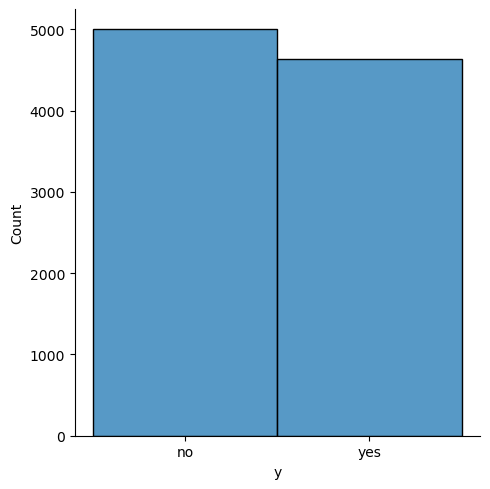

In [219]:
sns.displot(df['y']);

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Scale all the numeric variables using standard scalar.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [220]:
# type your code here

In [221]:
num = df[['age','duration','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
cat = df[['campaign']]

In [222]:
sc = StandardScaler()
num_sc = pd.DataFrame(sc.fit_transform(num))

In [223]:
num_sc.columns = num.columns

<a id="knn"> </a>
## 2. K Nearest Neighbors (KNN)

## We shall use the bank marketing dataset that we cleaned above

Before applying classification techniques to predict whether the client subscribed the term deposit or not, let us split the dataset in train and test set.

In [224]:
# type your code here

In [225]:
final = pd.concat([num,cat],axis = 1)

In [226]:
X_train,X_test,y_train,y_test = train_test_split(final, y, test_size=0.2,random_state=1)

In [227]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [228]:
ypred_knn_test = knn_model.predict(X_test)

In [229]:
ypred_knn_train = knn_model.predict(X_train)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Create a function to draw a confusion matrix (heatmap) and a function to plot a roc-auc curve.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Define a function to plot the confusion matrix.

In [230]:
# type your code here

In [231]:
confusion_matrix(y_test, ypred_knn)

array([[828, 165],
       [139, 796]], dtype=int64)

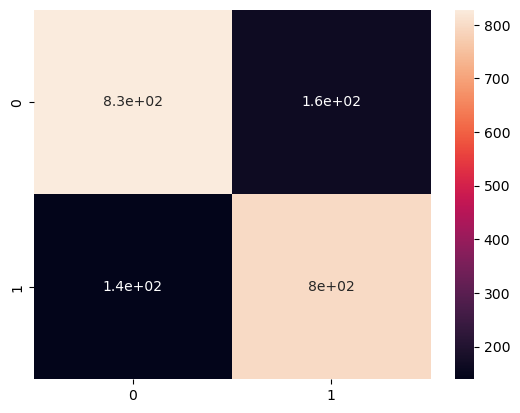

In [232]:
sns.heatmap(confusion_matrix(y_test, ypred_knn), annot = True)
plt.show()

#### Define a function to plot the ROC curve.

In [233]:
y_pred_proba = knn_model.predict_proba(X_test)

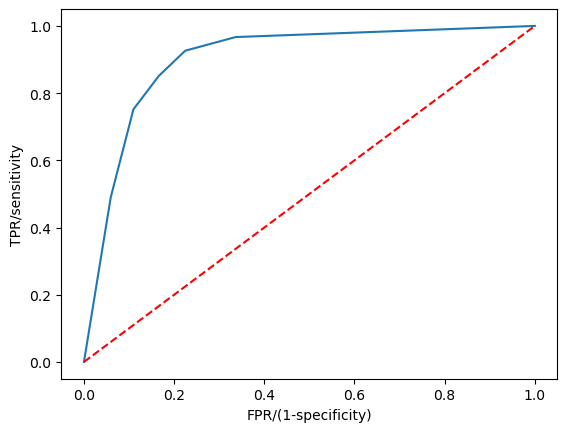

In [234]:
fpr,tpr,threshold = roc_curve(y_test, y_pred_proba[:,1])

roc_df = pd.DataFrame(roc_curve(y_test, y_pred_proba[:,1])).T
roc_df.columns = ['FPR','TPR','Threshold']

plt.plot(fpr,tpr)
plt.xlabel('FPR/(1-specificity)')
plt.ylabel('TPR/sensitivity')
plt.plot([0,1],[0,1],'r--')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a knn model on a training dataset with euclidean distance and 3 neighbours to predict whether or not the client subscribed the term deposit. Calculate the accuracy of the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [235]:
# type your code here

In [236]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

ypred_knn_test = knn_model.predict(X_test)
ypred_knn_train = knn_model.predict(X_train)

In [237]:
accuracy_score(y_test, ypred_knn_test)

0.8376556016597511

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Plot a confusion matrix using the function created above and print a classification report. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [238]:
# type your code here

In [239]:
confusion_matrix(y_test, ypred_knn_test)

array([[825, 168],
       [145, 790]], dtype=int64)

In [240]:
print(classification_report(y_test, ypred_knn_test))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       993
           1       0.82      0.84      0.83       935

    accuracy                           0.84      1928
   macro avg       0.84      0.84      0.84      1928
weighted avg       0.84      0.84      0.84      1928



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the optimal value of 'k' in knn with 3 fold cross validation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    n_neighbors = np.arange(1, 25, 2)
    metric = ['hamming','euclidean','manhattan','Chebyshev']

In [241]:
# type your code here

In [242]:
from sklearn.model_selection import cross_val_score,KFold

In [243]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

ypred_knn_test = knn_model.predict(X_test)
ypred_knn_train = knn_model.predict(X_train)

In [244]:
# Initialize variables to store the results
best_k = None
best_metric = None
best_score = 0
k_values = np.arange(1, 25, 2)
metric = ['hamming','euclidean','manhattan','chebyshev']
# Perform cross-validation for each 'k' value
for m in metric:
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k,metric=str(m))
        kf = KFold(n_splits=3, shuffle=True, random_state=42)
        scores = cross_val_score(knn, final, y, cv=kf)
        avg_score = np.mean(scores)

        # Update the best 'k' and score if a better one is found
        if avg_score > best_score:
            best_k = k
            best_metric=m
            best_score = avg_score

# Print the optimal 'k' and its corresponding score
print("Optimal k:", best_k)
print("Optimal Metric:", best_metric)
print("Average Cross-Validation Score:", best_score)

Optimal k: 23
Optimal Metric: manhattan
Average Cross-Validation Score: 0.8669091734967743


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13.  Build a KNN model with the best parameters and find the accuracy. Also generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [245]:
# type your code here

In [246]:
knn_model = KNeighborsClassifier(n_neighbors=23,metric='manhattan')
knn_model.fit(X_train, y_train)

ypred_knn_test = knn_model.predict(X_test)
ypred_knn_train = knn_model.predict(X_train)

In [247]:
accuracy_score(y_test, ypred_knn_test)

0.8661825726141079

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the area under the receiver operating characteristic curve and the confusion matrix for the tuned KNN model built in question 13.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [248]:
# type your code here

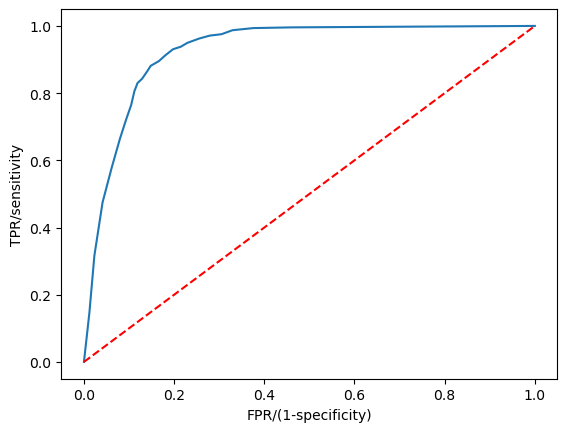

In [249]:
y_pred_proba = knn_model.predict_proba(X_test)

fpr,tpr,threshold = roc_curve(y_test, y_pred_proba[:,1])

roc_df = pd.DataFrame(roc_curve(y_test, y_pred_proba[:,1])).T
roc_df.columns = ['FPR','TPR','Threshold']

plt.plot(fpr,tpr)
plt.xlabel('FPR/(1-specificity)')
plt.ylabel('TPR/sensitivity')
plt.plot([0,1],[0,1],'r--')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Calculate the percentage of misclassified and correctly classified observations.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [250]:
# type your code here

In [251]:
accuracy  =accuracy_score(y_test, ypred_knn_test)

In [252]:
print('correctly_classified_percentage', accuracy * 100)
print('misclassified_percentage', (1 - accuracy) * 100)

correctly_classified_percentage 86.61825726141079
misclassified_percentage 13.381742738589208


In [253]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, ypred_knn_test)

# Extract the values from the confusion matrix
true_negative, false_positive, false_negative, true_positive = conf_matrix.ravel()

# Calculate percentages
total = len(y_test)
correctly_classified_percentage = ((true_positive + true_negative) / total) * 100
misclassified_percentage = ((false_positive + false_negative) / total) * 100

# Print the percentages
print("Correctly Classified Percentage:", correctly_classified_percentage, "%")
print("Misclassified Percentage:", misclassified_percentage, "%")


Correctly Classified Percentage: 86.61825726141079 %
Misclassified Percentage: 13.381742738589212 %


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Compute the accuracy for each value of k and append the value in a list 'accuracy'. Build knn models for euclidean distance metric. Consider only the odd numbers between the range 1 and 25 for the 'k'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [254]:
# type your code here

In [255]:
# Initialize variables to store the results
best_k = None
best_metric = None
list_accu = []
best_score = 0
k_values = np.arange(1, 25, 2)
# Perform cross-validation for each 'k' value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    scores = cross_val_score(knn, final, y, cv=kf)
    avg_score = np.mean(scores)
    list_accu.append((k, avg_score))

In [256]:
list_accu

[(1, 0.8174274250021288),
 (3, 0.846784186029156),
 (5, 0.8549790885954972),
 (7, 0.8553944567524859),
 (9, 0.8566392054989734),
 (11, 0.8567429184216037),
 (13, 0.8600621838539283),
 (15, 0.8605812003752386),
 (17, 0.8620335040836036),
 (19, 0.8612035424693282),
 (21, 0.860580974421159),
 (23, 0.8615150040287611)]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Draw a line plot to see the accuracy (list created in the above question) for each value of K using euclidean distance as a metric of KNN model and find the optimal value of 'k'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    n_neighbors = np.arange(1, 25, 2)

In [257]:
# type your code here

In [258]:
x = []
y_ax = []

In [259]:
for i in range(len(list_accu)):
    x.append(list_accu[i][0])
    y_ax.append(list_accu[i][1])

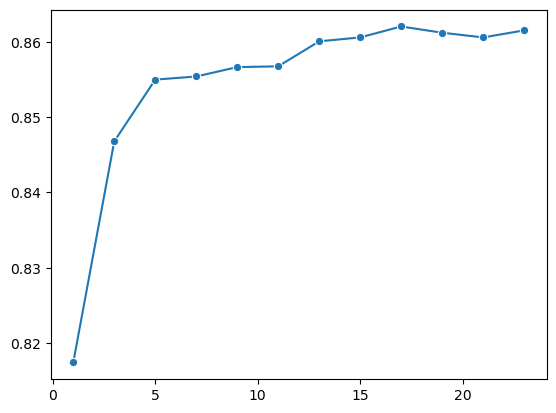

In [260]:
sns.lineplot(x=x, y=y_ax, marker='o')
plt.show()

<a id="nb"> </a>
## 3. Naive Bayes

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Build a Gaussian naive bayes model and generate a classification report. Also tell how well is the model performing.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [262]:
# type your code here

In [263]:
from sklearn.naive_bayes import GaussianNB

In [265]:
gm = GaussianNB()
gm.fit(X_train, y_train)

ypred_gm_test = gm.predict(X_test)
ypred_gm_train = gm.predict(X_train)

In [266]:
print(classification_report(y_test, ypred_gm_test))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77       993
           1       0.74      0.86      0.79       935

    accuracy                           0.78      1928
   macro avg       0.79      0.78      0.78      1928
weighted avg       0.79      0.78      0.78      1928



In [268]:
#model is performing good!

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Find the area under the receiver operating characteristic curve and the confusion matrix for the Naive Bayes model built in question 18.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [269]:
# type your code here

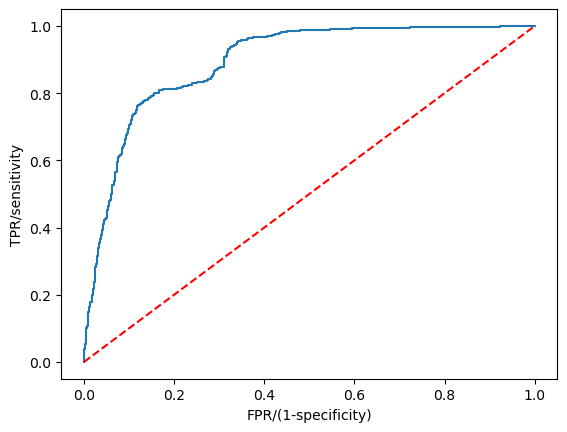

In [271]:
y_pred_proba = gm.predict_proba(X_test)

fpr,tpr,threshold = roc_curve(y_test, y_pred_proba[:,1])

roc_df = pd.DataFrame(roc_curve(y_test, y_pred_proba[:,1])).T
roc_df.columns = ['FPR','TPR','Threshold']

plt.plot(fpr,tpr)
plt.xlabel('FPR/(1-specificity)')
plt.ylabel('TPR/sensitivity')
plt.plot([0,1],[0,1],'r--')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build a Gaussian Naive Bayes model and perform 10 fold cross validation and find the average accuracy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [274]:
# Initialize variables to store the results

# Perform cross-validation for each 'k' value

knn = KNeighborsClassifier(n_neighbors=10)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(gm, final, y, cv=kf)
avg_score = np.mean(scores)


# Print the optimal 'k' and its corresponding score
print("Average Cross-Validation Score:", avg_score)

Average Cross-Validation Score: 0.787448132780083
